<a href="https://colab.research.google.com/github/borumv/dog-vision/blob/main/dog_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# 🦮 Dog vision. What we wann do:
## 1. Problem
We need to indentify the breed of dogs by photos 📷(image).
## 2. Data
We use the data from kaggle set:
https://www.kaggle.com/competitions/dog-breed-identification/data
## 3. Evaluation
The evaluation file must consist of **prediction probabilities for each dog breed** of each test image.
## 4. Features
* We're dealing with images (unstructed data), so it's probably best we use deep/transfer learning
* There are 120 breeds of dogs (this means there are 120 different classes)
* There are **10 350** images in test set
* There are **10 222** images in train set




In [1]:
# unzip unploaded data into google cloud
# !unzip "drive/My Drive/Dog Vision/dog-breed-identification.zip" -d "drive/My Drive/Dog Vision/"

### Get Our WorkSpace ready


In [2]:
#Import TensorFlow into colab
import tensorflow as tf
print("tensorFlow version - ", tf.__version__)

tensorFlow version -  2.12.0


In [3]:
# Check for GPY availability
if (tf.config.list_physical_devices('GPU')):
  print("YES! We have the GPU!")
  print(tf.config.list_physical_devices('GPU'))
else:
  print("GPU is not available")

GPU is not available


### Getting our data ready (tuning into Tensors)
With all machine learning models, our data has to be in numerical format. So that's what we'll be doing first. (*numerical representations*)

Let's start by accesing our data and checking out the labels

In [4]:
#Checkout the labels of our data
import pandas as pd
labels_csv = pd.read_csv("drive/MyDrive/Dog Vision/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [5]:
# We need at least 10 examples. A good set is a set where from 100 examples
labels_csv['breed'].value_counts(),
# Mediana
labels_csv['breed'].value_counts().median()

82.0

<Axes: >

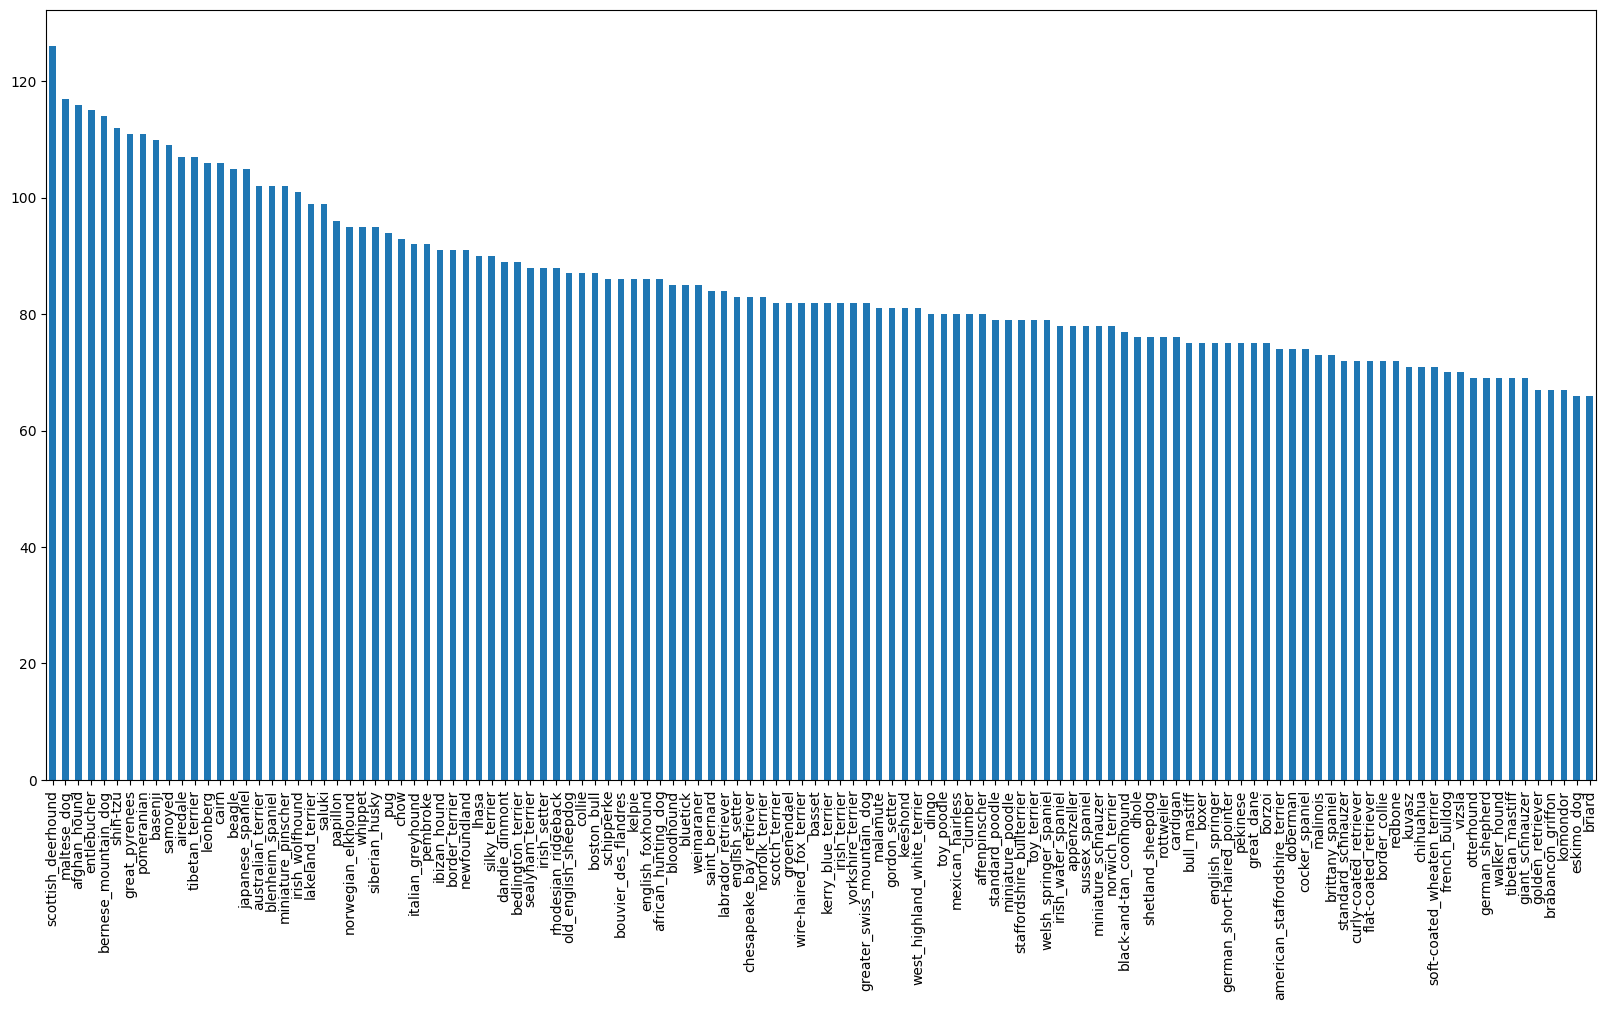

In [6]:
#Plotting our labels. 

labels_csv['breed'].value_counts().plot.bar(figsize=(20,10))

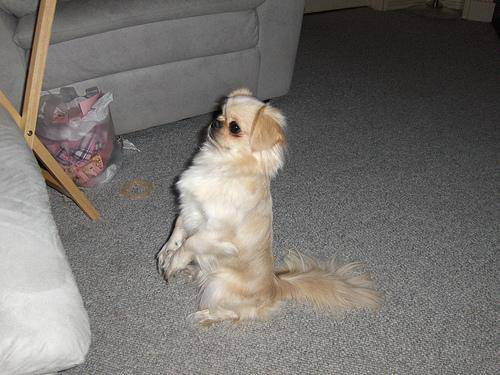

In [7]:
#Let's view images
from IPython.display import Image
Image(data="drive/MyDrive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg")

### Getting images and their pathnames

In [8]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [9]:
#Create list of pathnames
filenames = ["drive/MyDrive/Dog Vision/train/" + names + ".jpg" for names in labels_csv["id"]]
filenames[:10]
             

['drive/MyDrive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [10]:
#Check whether number of filenames mathes number of files
import os
if len(os.listdir("drive/MyDrive/Dog Vision/train")) == len(filenames):
  print("Filenames match amount of files in directory. Procced")
else:
  print("check the target directory")

Filenames match amount of files in directory. Procced


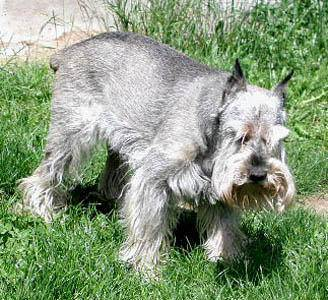

In [11]:
#One more check
Image(filenames[1001])

In [12]:
labels_csv['breed'][1001]

'standard_schnauzer'

let's prepare our labels

In [13]:
import numpy as np
labels = labels_csv["breed"].to_numpy()
len(labels)

10222

In [14]:
# See wether match or not number of labels and filenames
if len(labels) == len(filenames):
  print("everything is good")
else:
  print("something wrong. Check the right directory")

everything is good


In [15]:
# Find the unique label values
unique_breeds = np.unique(labels)
len(unique_breeds), unique_breeds

(120,
 array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
        'american_staffordshire_terrier', 'appenzeller',
        'australian_terrier', 'basenji', 'basset', 'beagle',
        'bedlington_terrier', 'bernese_mountain_dog',
        'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
        'bluetick', 'border_collie', 'border_terrier', 'borzoi',
        'boston_bull', 'bouvier_des_flandres', 'boxer',
        'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
        'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
        'chow', 'clumber', 'cocker_spaniel', 'collie',
        'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
        'doberman', 'english_foxhound', 'english_setter',
        'english_springer', 'entlebucher', 'eskimo_dog',
        'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
        'german_short-haired_pointer', 'giant_schnauzer',
        'golden_retriever', 'gordon_setter'

In [16]:
# Turn a single label into an array of booleans
labels[0] == unique_breeds

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [17]:
# Turn every label int a boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [18]:
#  Example: Turning boolean array into integers
print(labels[0]) # original label
print(np.where(labels[0]==unique_breeds)) #index where label occur
print(boolean_labels[0].argmax()) #index where label occurs in boolean array
print(boolean_labels[0].astype(int)) #convert boolean array to int

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


### Creating our own validation set
Since the dataset from Kaggle doesn't come with a validation set, we're going to create our own.

In [19]:
# Setup X & y varibables 
X = filenames
y = boolean_labels

We're going to start off experimenting with ~1000 images and increse as needed.

In [20]:
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:100}

In [21]:
# Let's split our data into train and validation sets
from sklearn.model_selection import train_test_split

# Split them into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES], 
                                                  y[:NUM_IMAGES], 
                                                  train_size=0.2, 
                                                  random_state=42)

len(X_train), len(X_val), len(y_train), len(y_val)

(200, 800, 200, 800)

In [22]:
# Let's see what's it 
X_train[1], unique_breeds[np.argmax(y_train[1])]

('drive/MyDrive/Dog Vision/train/1758bbaf1dba23fd418911be2a2becc2.jpg',
 'entlebucher')

## Preprocessing Images (turning image into Tensors)
To preprocess our images into Tensors we're going to write a function which does a few things:
1. Take an image filepath as input
2. Use TF to read the file and save it to a variable, `image`
3. Turn our `image` (a jpg) into Tensors
4. Resize the `image` to be shape of (224,224)
5. Return the modified `image`

Before we do let's se what importing an imge looks like

In [23]:
# Convert Image to NumPy array
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [24]:
image[:2]

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)

In [25]:
# Turn into Tensor Flow array
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

Now we've seen what an image looks like a Tensor. Let's make function to preprocess them
1. Take an image filepath as input
2. Use TF to read the file and save it to a vaiavle, `image`
3. Turn our `image` (a jpg) into Tensors
4. Normalize our image (convert color channel values from  0-255 to 0-1)
5. Resize the `image` to be shape of (224,224)
6. Return the modified `image`

In [26]:
# Define image size
IMG_SIZE = 224

# Create a function for preprocessing images
def process_image(image_path, img_size=IMG_SIZE):
  """
  Takes the file image path and turns the image into Tensors
  """
  # Read image and convert them into Tensor Flow object
  image = tf.io.read_file(image_path)
  # Normalize our image (conver color channel)
  image = tf.io.decode_jpeg(image, channels=3)
  # Convert our image into 0-1
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to be shape of IMG_SIZE
  image = tf.image.resize(image, [img_size, img_size])
  
  return image



## Turning our data into banches
Why turn our data into batches?
Let's say you're trying to process 10,000+ images in one go... they all might not fit into memory
So that's why we do about 32 (this is batch size images at a time)

In order to use Tensor Flow more effectively, we need our data in the form of Tensor tuples which look like this:
`(image, label)`

In [27]:
# Create a function to make a TensorFlow tuple
def get_image_label(image_path, label):
  """
  Takes the image path and associated label and return Tuple of (image, label)
  """
  image = process_image(image_path)
  return image, label

In [28]:
print(get_image_label(X[0], tf.constant(y[0])))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.5705322 , 0.33588538, 0.15008473],
        [0.66901225, 0.46011657, 0.26022965],
        [0.61062384, 0.43763596, 0.21601713],
        ...,
        [0.8182312 , 0.7297958 , 0.26963907],
        [0.72454786, 0.6059109 , 0.2653059 ],
        [0.7494603 , 0.6252918 , 0.32456532]],

       [[0.6761415 , 0.4733761 , 0.3064293 ],
        [0.5672121 , 0.38192675, 0.20349538],
        [0.5883547 , 0.4322571 , 0.2403155 ],
        ...,
        [0.9326942 , 0.8260503 , 0.41093278],
        [0.86072475, 0.74250627, 0.3694122 ],
        [0.76781666, 0.6461604 , 0.29291284]],

       [[0.46350825, 0.29595745, 0.1536156 ],
        [0.42554107, 0.27039403, 0.12009467],
        [0.7887875 , 0.6547362 , 0.49015   ],
        ...,
        [0.89372385, 0.76964   , 0.41811958],
        [0.88609535, 0.7585918 , 0.36495727],
        [0.8243601 , 0.69494826, 0.2930575 ]],

       ...,

       [[0.7344025 , 0.4716574 , 0.2559711 ],
        [0.7

Let's make a function to turn all of our data (`X`, `y`) into batches!

In [29]:
# Define the batch size, 32 is a good start
BATCH_SIZE = 32
# Create a function to turn our data into batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (X) and label (y) pairs
  Shuffles the data if it's training data but doesn't shuffle if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a dataset, we probably don't have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  # If the data is a valid dataset, we don't need to shuffle it
  if valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), #filepath
                                               tf.constant(y))) #labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch
  else:
    print("Creadint train data batches...")
    # Create an Tensor Flow dataset
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    # Shuffling our Data. It's more effectivly to shuffle data with pathnames
    # before we transform this one into TensorFlow object
    data.shuffle(buffer_size=len(X))  
    #Create (image, label) tuples (this also turns the image path into a preprocess image)
    data = data.map(get_image_label)
    # Turn the training data into batches
    data_batch = data.batch(batch_size = len(data))
    return data_batch

In [30]:
# Creatin training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)


Creadint train data batches...
Creating validation data batches...


In [31]:
# Check out the different attributes of our batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

 ## Visualizing Data Batches
Our data is now in batches, however, these can be a little hard to understand/comprehend, let's visualize


In [32]:
unique_breeds[y[0].argmax()]

'boston_bull'

In [33]:
# Create a function for viewnig first 25 images
import matplotlib.pyplot as plt

def show_25_images(images, labels):
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Crate subplot (5 rows, 5 columns)
    ax = plt.subplot(5,5, i + 1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn the grid lines off
    plt.axis("off")


In [34]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

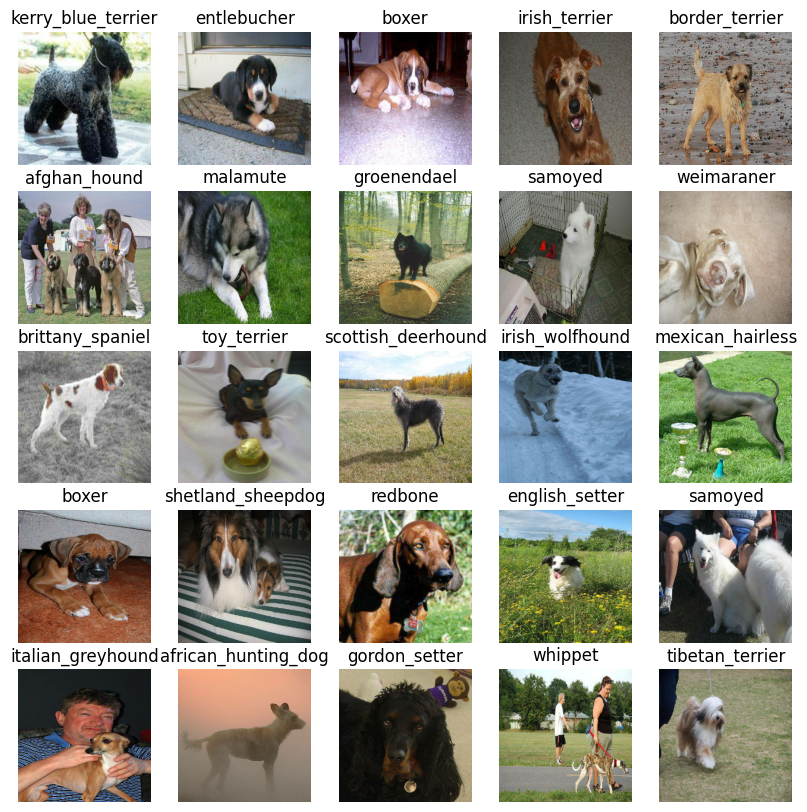

In [35]:
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

In [36]:
val_images, val_labels = next(val_data.as_numpy_iterator())

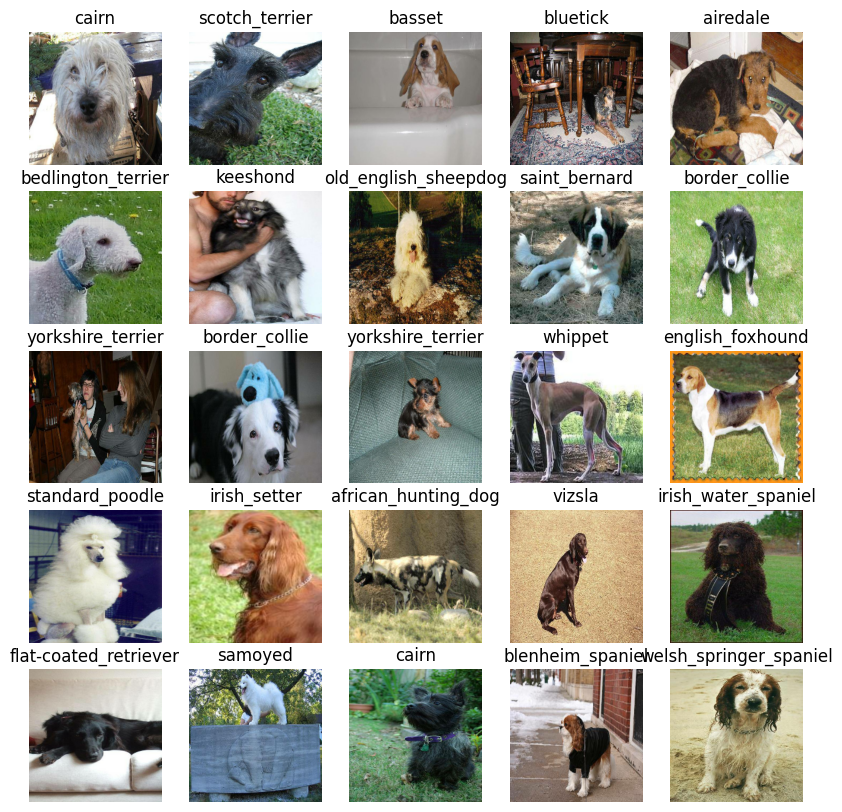

In [37]:
show_25_images(val_images, val_labels)

## Building a model
Before we build a model, there  are a few things we need to define:
* The input shape (our  images shape in the form of Tensors) to our model.
* The output shape (image labels, in the form of Tensors) of our model
* The URL of the model we want to use

In [38]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of our model
OUTPUT_SHAPE = len(unique_breeds)

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"

Now we've got our input, outputs and model ready to go. Let's put them together into a Keras deep learning model
Knowing this, let's create a function which:
* Takes the input shape, output shape and the model we've chosen as parameters.
* Defines the layers in a Keras model in sequential fashion (do this first, then this, then that)
* Compiles the model (says it should be evaluated and improved).
* Builds the model (tells the model the input shape it'll be getting).
* Returns the model.

https://www.tensorflow.org/guide/keras/sequential_model

In [39]:
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential, load_model
import tensorflow_hub as hub

# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, hub_url=MODEL_URL):
  print("Building model with:", hub_url)
  # Setup the model layers
  model = tf.keras.Sequential([
      hub.KerasLayer(hub_url), # 1 Layer (inpyut layer)
      Dense(units = output_shape, 
            activation="softmax") # 2 Layer (output layer)

  ])
  # Compile the model
  model.compile(
      loss=keras.losses.CategoricalCrossentropy(),
      optimizer=keras.optimizers.Adam(),
      metrics=["accuracy"]
  )
  # Build the model
  model.build(input_shape)

  return model



In [40]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


## Creating callbacks
Calbacks are helper functions a model can use duriong training to do such things as save it's progress, check its progress or stop training early if a model stops improving

We'll create two callbacks, ne for TensorBoard which helps track our models progress and another for early stopping which prevents our model from training for too long

### TensorBoard callback

To setup a TensorBoard callback, we need to do 3 things:
1. Load the TensorBoard notebook extension
2. Create a TensorBoard callback which is able to save logs to a directory and pass it to our model's `fit()` function.
3. Visualize our models training logs with the `%tensorboard` magic function (we'll do this after model training).

In [ ]:
# Load TensorBOard notebook extension
%load_ext tensorboard

In [42]:
import datetime


# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("drive/MyDrive/Dog Vision/logs",
                        # Make it so the logs get trackecd whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(log_dir=logdir)

  
                  

### Early stopping callback
Eatly stopping helps stop our model from overfitting by stopping training if a certain evaluation metric stops improving

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping


In [43]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

## Training a model  (on subset of data)

Our furst model is only ggoing to train on 1000 images, to make sure everything is working.


In [44]:
NUM_EPOCHS = 90 #@param {type:"slider", min:10, max:100, step: 10}

In [46]:
# Check to make sure we're still running on a GPU
print("GPU", "available" if tf.config.list_physical_devices("GPU") else "GPU is not available")

GPU GPU is not available


Let's create a function which trains a model.
* Create a model using `create_model()`
* Setup a TensorBoard callback using `create_tensorboard_callback`
* Call the `fit()`